# Exploratry Data Analysis of Big Game Census

Import the necessary libs


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the datasets


In [2]:
cleaned_dataset = pd.read_csv("assets/cleaned_dataset.csv")
places_cleaned = pd.read_csv("assets/places_cleaned.csv")
states_cleaned = pd.read_csv("assets/states_cleaned.csv")

Display the first few rows of each dataset to understand their structure


In [3]:
cleaned_dataset_head = cleaned_dataset.head()
places_cleaned_head = places_cleaned.head()
states_cleaned_head = states_cleaned.head()

cleaned_dataset_head, places_cleaned_head, states_cleaned_head

(        Player Name Player Jersey Number Player Position  Player Age  \
 0    Devin McCourty                  #32            S/FS        30.0   
 1    Danny Amendola                  #80        PR/WR/KR        32.0   
 2  Johnson Bademosi                  #29     CB/SPTM/RCB        27.0   
 3       Chris Hogan                  #15              WR        29.0   
 4     James Develin                  #46           RB/FB        29.0   
 
    Player Weight (lbs.) Years Played Player Birthplace (city, town, etc.)  \
 0                 195.0            8                               Nanuet   
 1                 190.0            9                        The Woodlands   
 2                 206.0            6                        Silver Spring   
 3                 210.0            5                              Wyckoff   
 4                 255.0            5                        Gilbertsville   
 
   Player Birth State    Player Birthplace (Combo) Player College  ...  \
 0           New

Extract 2017 population data using the correct column name for states


In [4]:
states_population_2017 = states_cleaned[
    ["Geography Name", "Population Estimate (as of July 1) - 2017"]
].copy()
states_population_2017.columns = ["State", "Population 2017"]

Sort states by population for better visualization


In [5]:
states_population_2017 = states_population_2017.sort_values(
    by="Population 2017", ascending=False
)

Plot the data


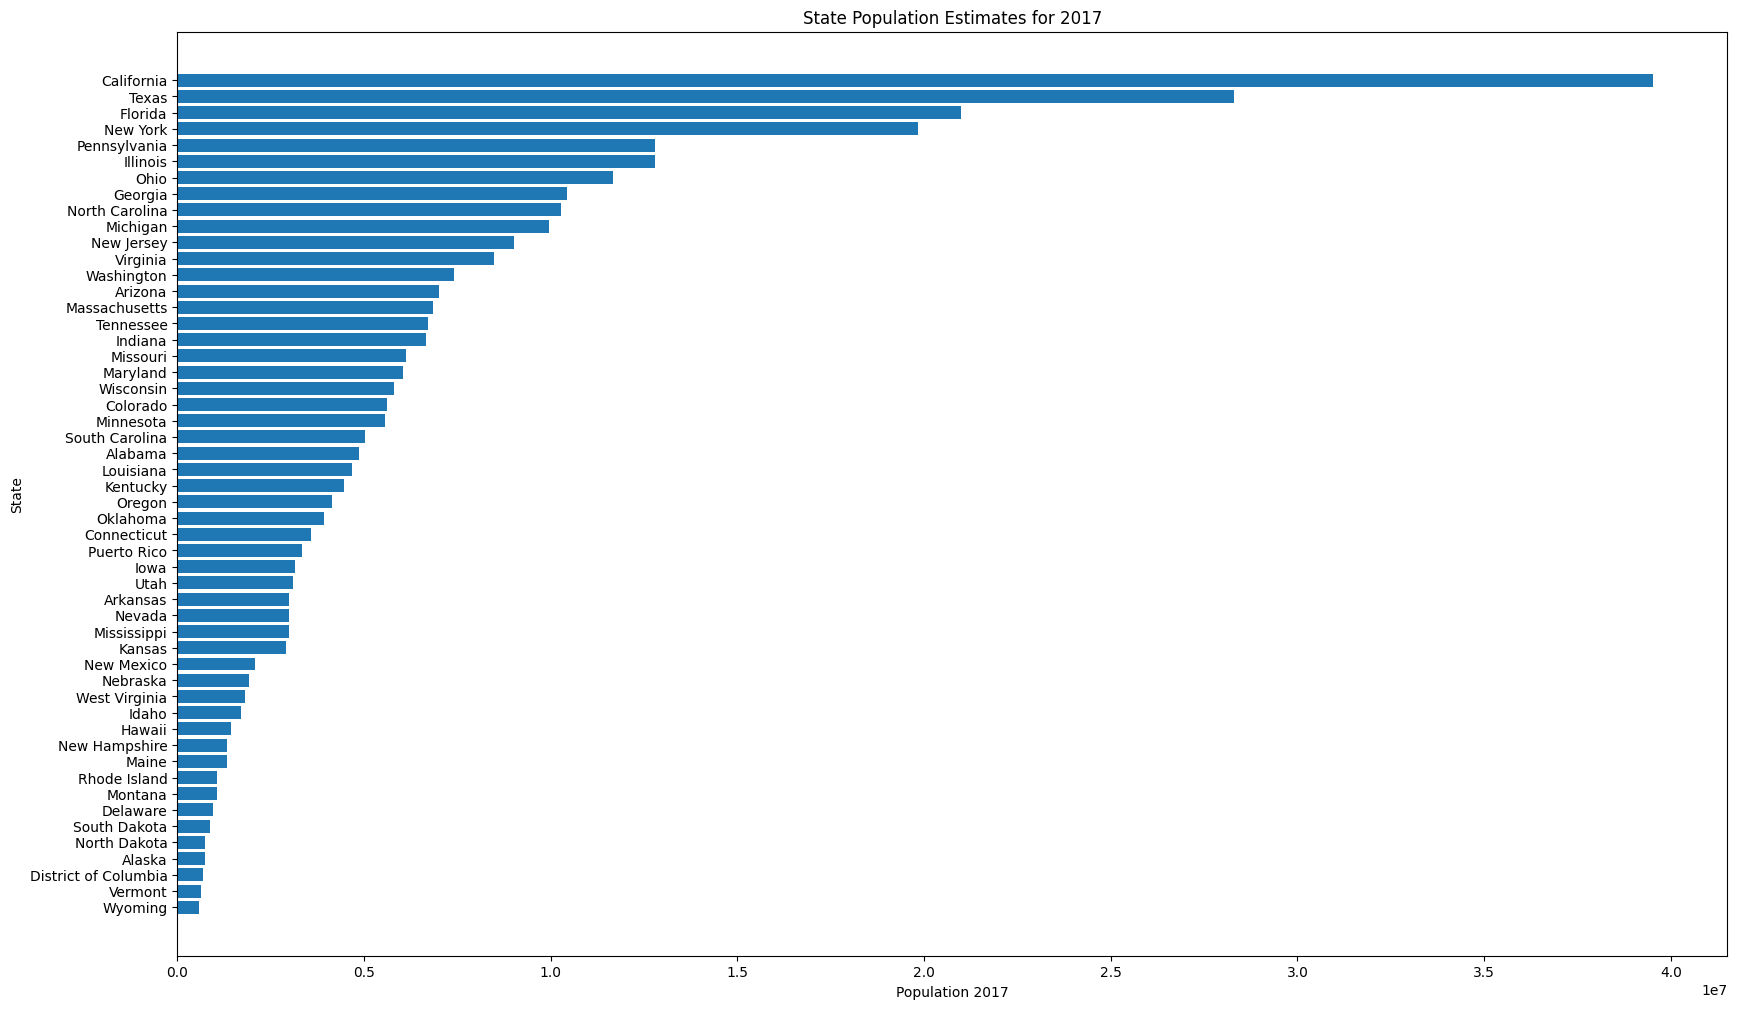

In [6]:
plt.figure(figsize=(20, 12))
plt.barh(
    states_population_2017["State"],
    states_population_2017["Population 2017"],
)
plt.xlabel("Population 2017")
plt.ylabel("State")
plt.title("State Population Estimates for 2017")
plt.gca().invert_yaxis()
plt.show()

Checking the columns in places_cleaned to identify the correct column for merging


In [7]:
places_cleaned.columns.tolist()

['Geographic ID',
 'GEOID 2',
 'Geography, full name (City, State)',
 'April 1, 2010 - Census',
 'April 1, 2010 - Estimates Base',
 'Population Estimate (as of July 1) - 2010',
 'Population Estimate (as of July 1) - 2011',
 'Population Estimate (as of July 1) - 2012',
 'Population Estimate (as of July 1) - 2013',
 'Population Estimate (as of July 1) - 2014',
 'Population Estimate (as of July 1) - 2015',
 'Population Estimate (as of July 1) - 2016']

Extract state information from the 'Geography, full name (City, State)' column


In [8]:
places_cleaned["State"] = places_cleaned["Geography, full name (City, State)"].apply(
    lambda x: x.split(", ")[-1]
)

Check the new column


In [9]:
places_cleaned[["Geography, full name (City, State)", "State"]].head()

,"Geography, full name (City, State)",State
0,"Abbeville city, Alabama",Alabama
1,"Adamsville city, Alabama",Alabama
2,"Addison town, Alabama",Alabama
3,"Akron town, Alabama",Alabama
4,"Alabaster city, Alabama",Alabama


Define a mapping of states to regions


In [10]:
state_to_region = {
    "Northeast": [
        "Connecticut",
        "Maine",
        "Massachusetts",
        "New Hampshire",
        "Rhode Island",
        "Vermont",
        "New Jersey",
        "New York",
        "Pennsylvania",
    ],
    "Midwest": [
        "Illinois",
        "Indiana",
        "Michigan",
        "Ohio",
        "Wisconsin",
        "Iowa",
        "Kansas",
        "Minnesota",
        "Missouri",
        "Nebraska",
        "North Dakota",
        "South Dakota",
    ],
    "South": [
        "Delaware",
        "Florida",
        "Georgia",
        "Maryland",
        "North Carolina",
        "South Carolina",
        "Virginia",
        "District of Columbia",
        "West Virginia",
        "Alabama",
        "Kentucky",
        "Mississippi",
        "Tennessee",
        "Arkansas",
        "Louisiana",
        "Oklahoma",
        "Texas",
    ],
    "West": [
        "Arizona",
        "Colorado",
        "Idaho",
        "Montana",
        "Nevada",
        "New Mexico",
        "Utah",
        "Wyoming",
        "Alaska",
        "California",
        "Hawaii",
        "Oregon",
        "Washington",
    ],
}

Create a reverse mapping from state to region


In [11]:
state_to_region_rev = {
    state: region for region, states in state_to_region.items() for state in states
}

Assign regions to players based on their birth state


In [12]:
cleaned_dataset["Region"] = cleaned_dataset["Player Birth State"].map(
    state_to_region_rev
)

Aggregate player data by region


In [13]:
region_wise_players = cleaned_dataset["Region"].value_counts().reset_index()
region_wise_players.columns = ["Region", "Player Count"]

Display the result


In [14]:
region_wise_players

,Region,Player Count
0,South,53
1,West,27
2,Midwest,20
3,Northeast,15


Extracting population estimates from states_cleaned


In [15]:
population_estimates = states_cleaned[
    [
        "Geography Name",
        "Population Estimate (as of July 1) - 2010",
        "Population Estimate (as of July 1) - 2011",
        "Population Estimate (as of July 1) - 2012",
        "Population Estimate (as of July 1) - 2013",
        "Population Estimate (as of July 1) - 2014",
        "Population Estimate (as of July 1) - 2015",
        "Population Estimate (as of July 1) - 2016",
        "Population Estimate (as of July 1) - 2017",
    ]
]

Rename columns for clarity


In [16]:
population_estimates.columns = [
    "State",
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
    "2016",
    "2017",
]

population_estimates.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747
1,Alaska,714015,722259,730825,736760,736759,737979,741522,739795
2,Arizona,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
3,Arkansas,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279
4,California,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653


Distribution of Player Ages


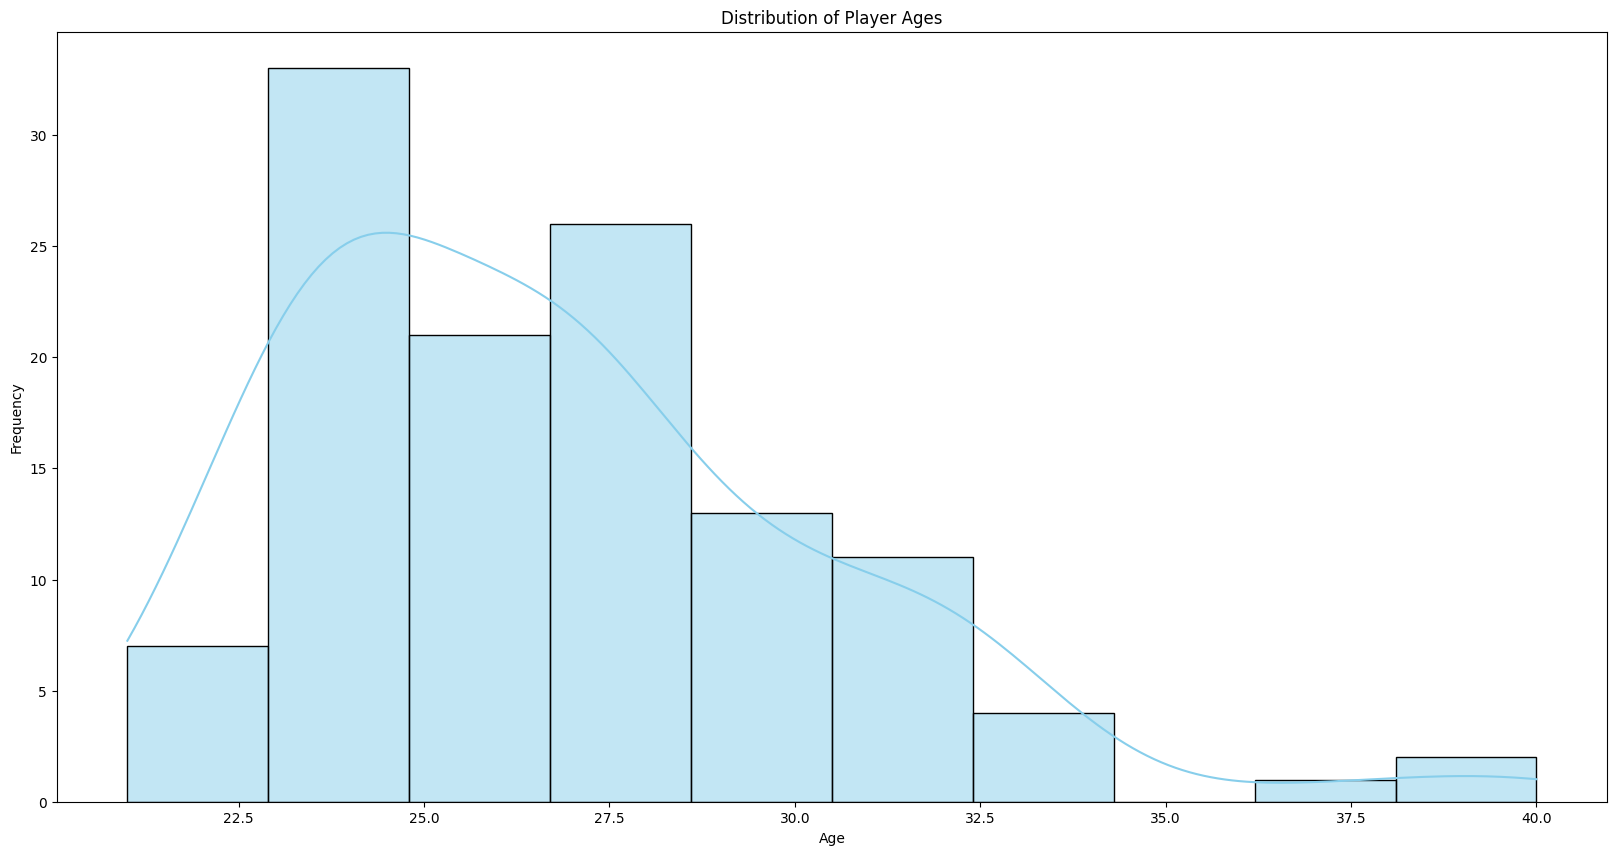

In [17]:
plt.figure(figsize=(20, 10))
sns.histplot(
    cleaned_dataset["Player Age"],
    bins=10,
    kde=True,
    color="skyblue",
)
plt.title("Distribution of Player Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Distribution of Player Weights


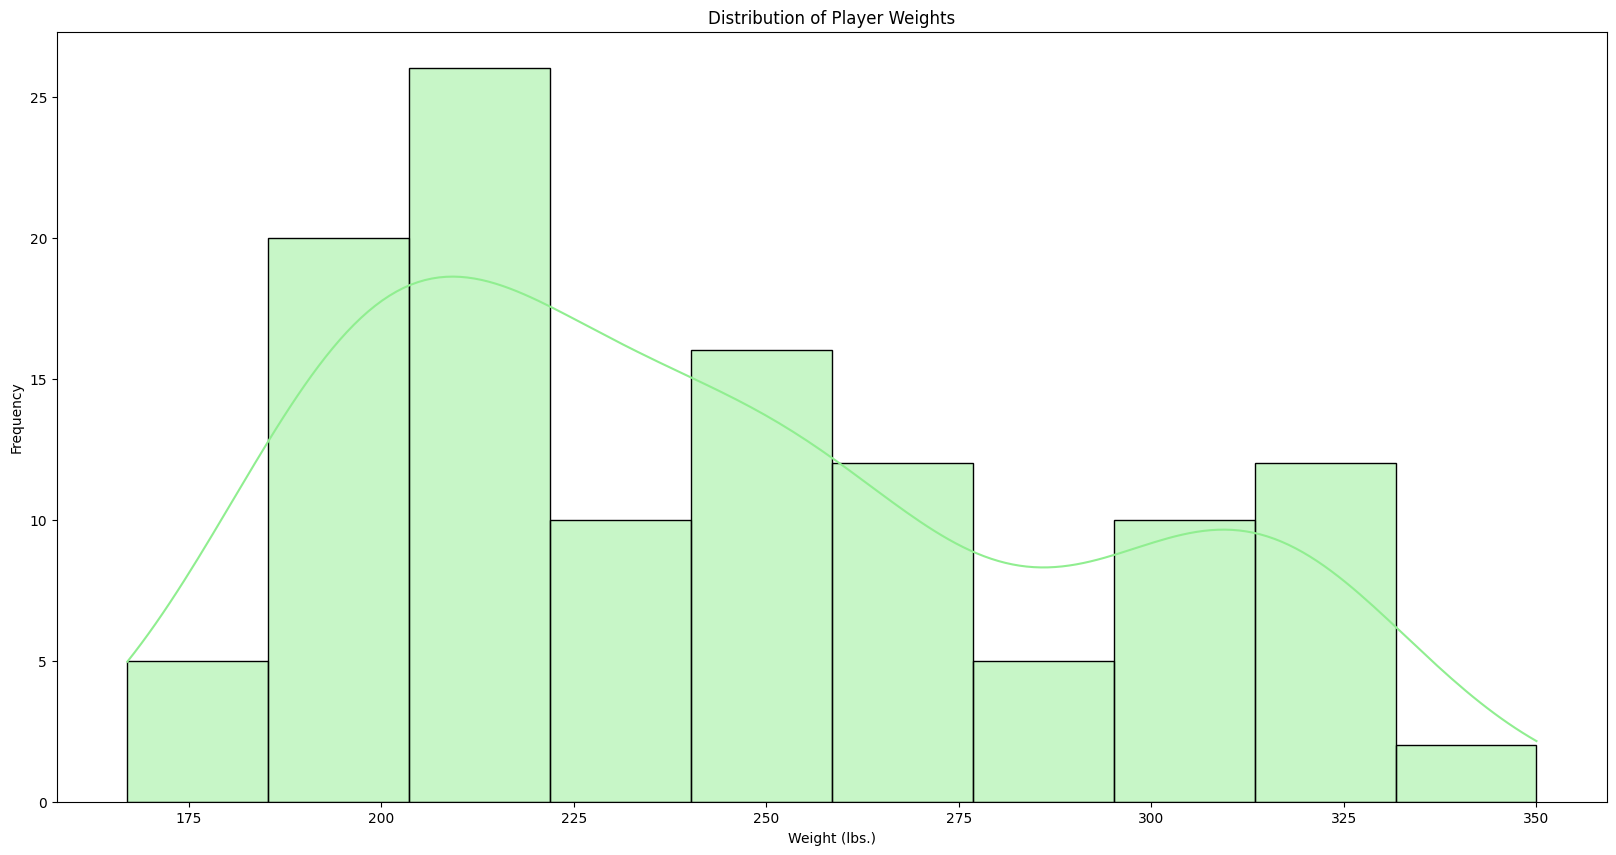

In [18]:
plt.figure(figsize=(20, 10))
sns.histplot(
    cleaned_dataset["Player Weight (lbs.)"],
    bins=10,
    kde=True,
    color="lightgreen",
)
plt.title("Distribution of Player Weights")
plt.xlabel("Weight (lbs.)")
plt.ylabel("Frequency")
plt.show()

Distribution of Years Played


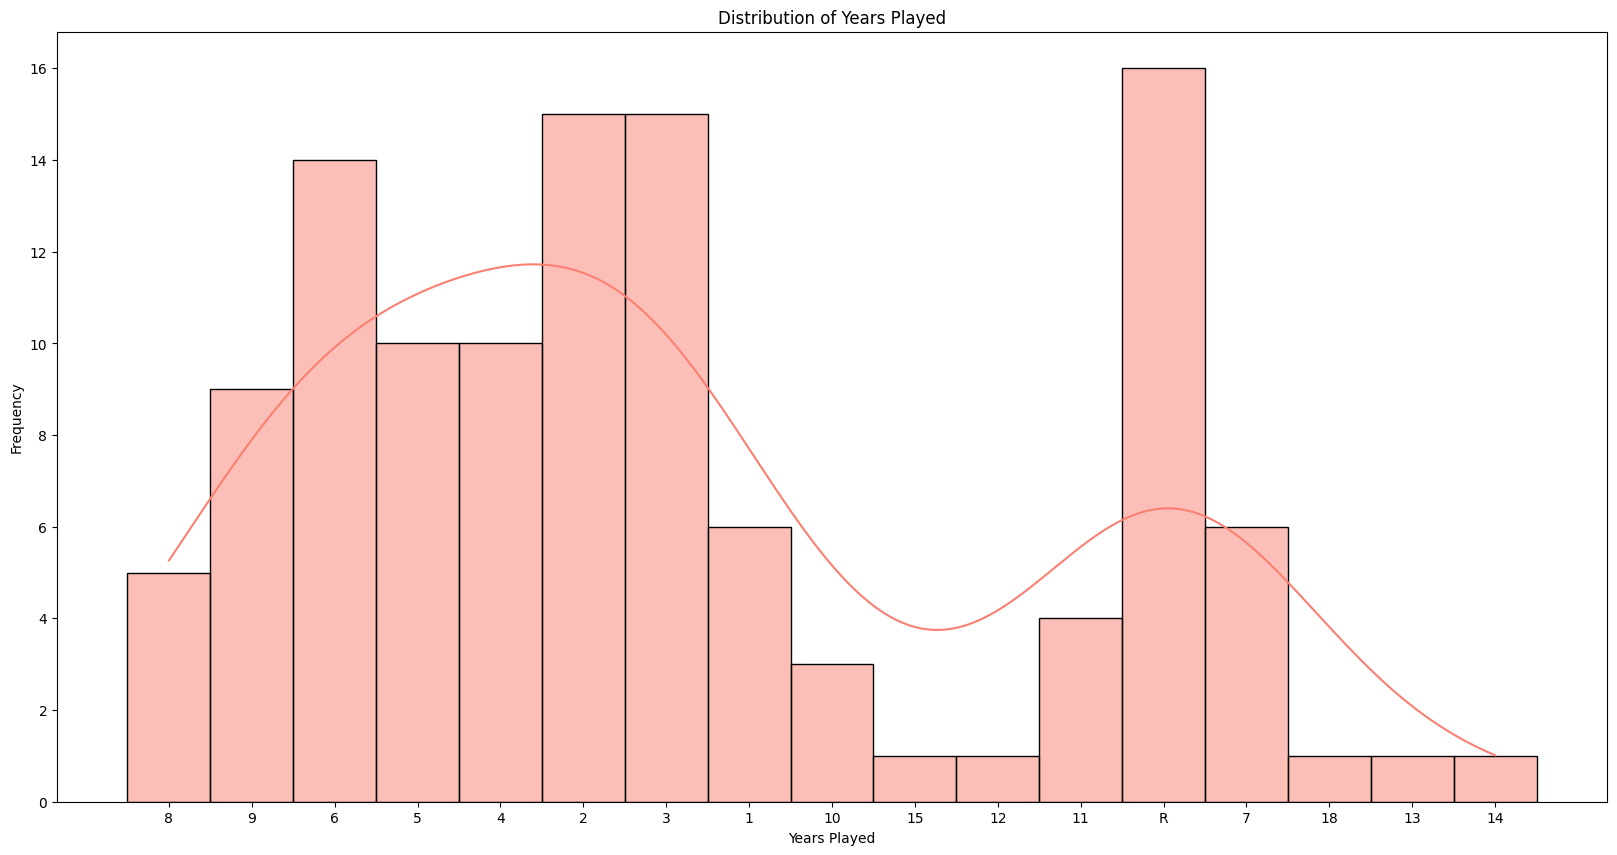

In [19]:
plt.figure(figsize=(20, 10))
sns.histplot(cleaned_dataset["Years Played"], bins=10, kde=True, color="salmon")
plt.title("Distribution of Years Played")
plt.xlabel("Years Played")
plt.ylabel("Frequency")
plt.show()

Position-wise Analysis


C:\Users\HP\AppData\Local\Temp\ipykernel_16156\3148515025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


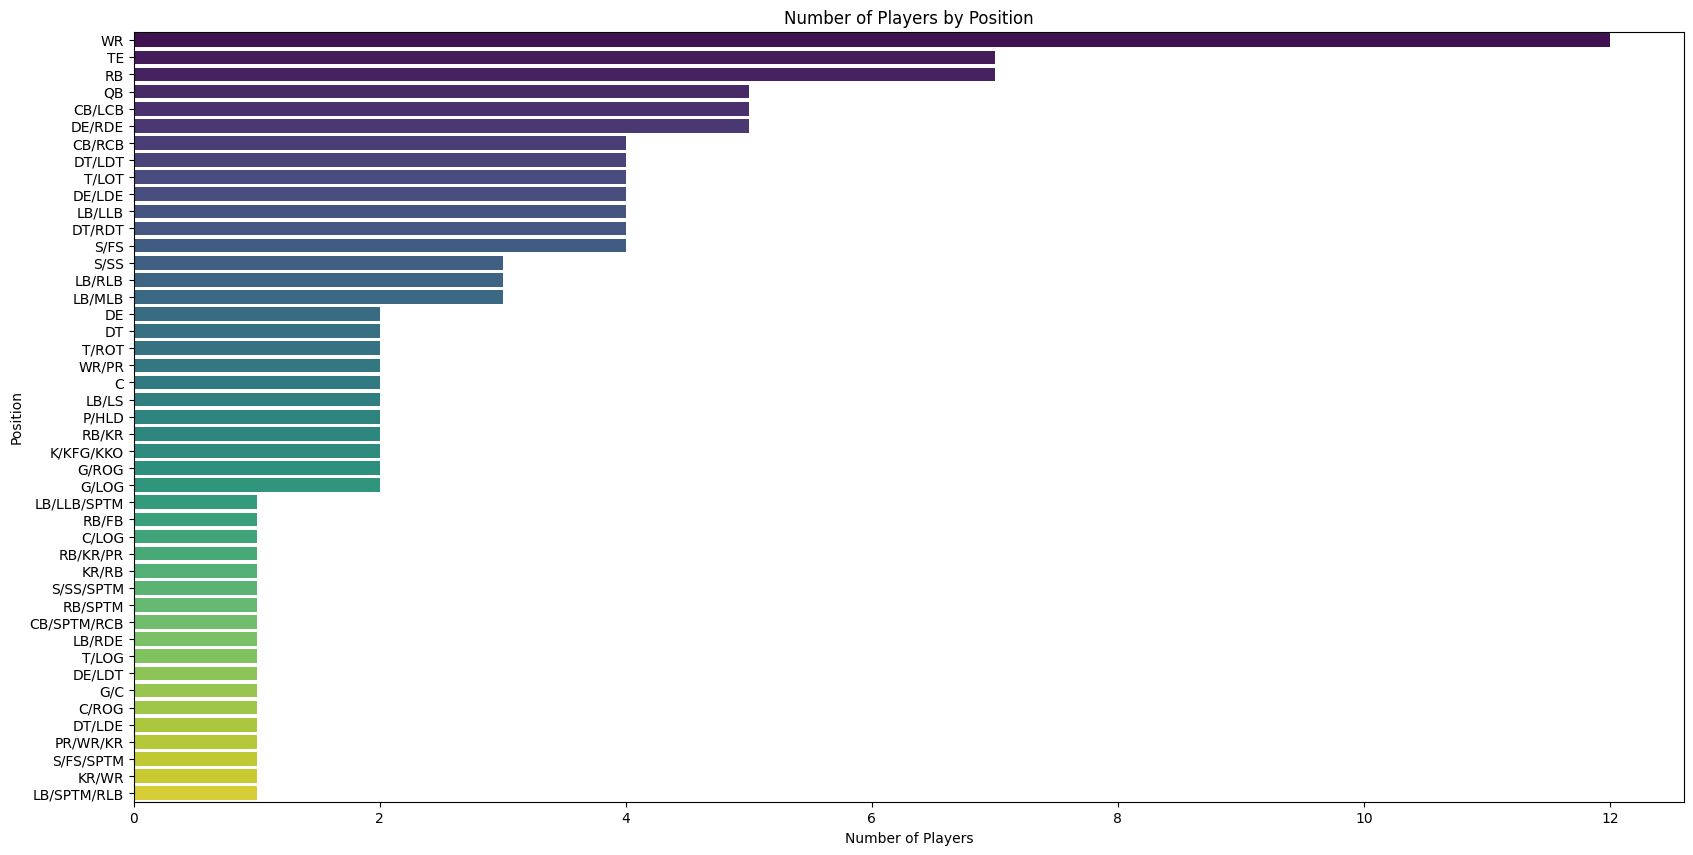

In [20]:
plt.figure(figsize=(20, 10))
sns.countplot(
    y=cleaned_dataset["Player Position"],
    order=cleaned_dataset["Player Position"].value_counts().index,
    palette="viridis",
)
plt.title("Number of Players by Position")
plt.xlabel("Number of Players")
plt.ylabel("Position")
plt.show()

### Plotting state population trends over the years


Reshaping the population estimates data for better visualization


In [21]:
population_trends = population_estimates.melt(
    id_vars=["State"], var_name="Year", value_name="Population"
)

Converting 'Year' to a numerical format for plotting


In [22]:
population_trends["Year"] = population_trends["Year"].astype(int)

Plot the state population trends


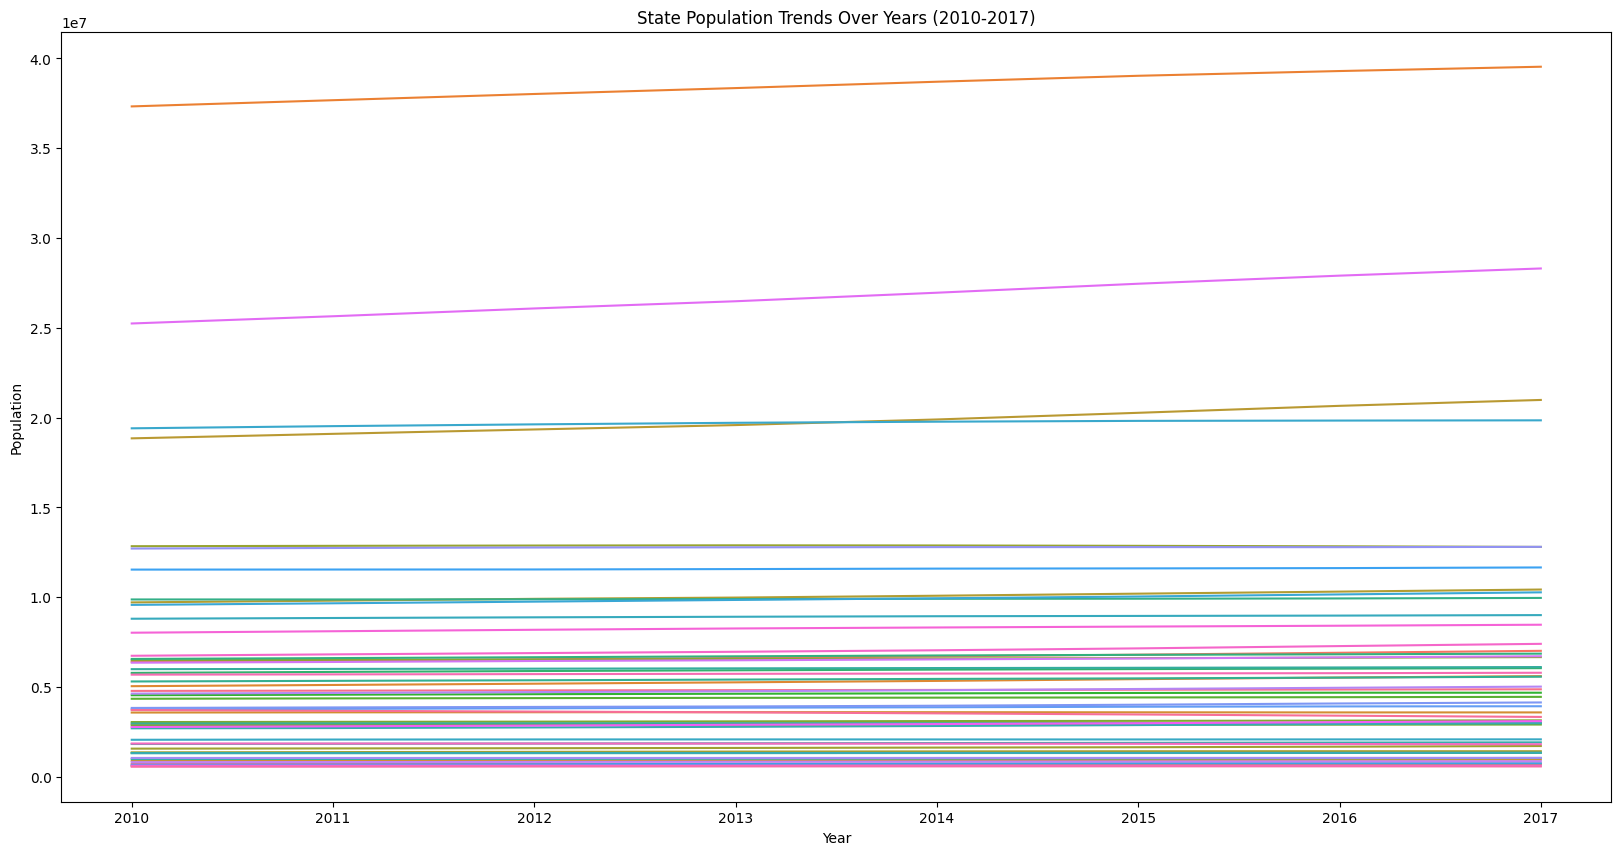

In [23]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=population_trends, x="Year", y="Population", hue="State", legend=None)
plt.title("State Population Trends Over Years (2010-2017)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

### Analyzing player distribution by state


Count the number of players from each state


In [24]:
player_distribution_by_state = (
    cleaned_dataset["Player Birth State"].value_counts().reset_index()
)
player_distribution_by_state.columns = ["State", "Player Count"]

Plot the player distribution by state


C:\Users\HP\AppData\Local\Temp\ipykernel_16156\299137580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


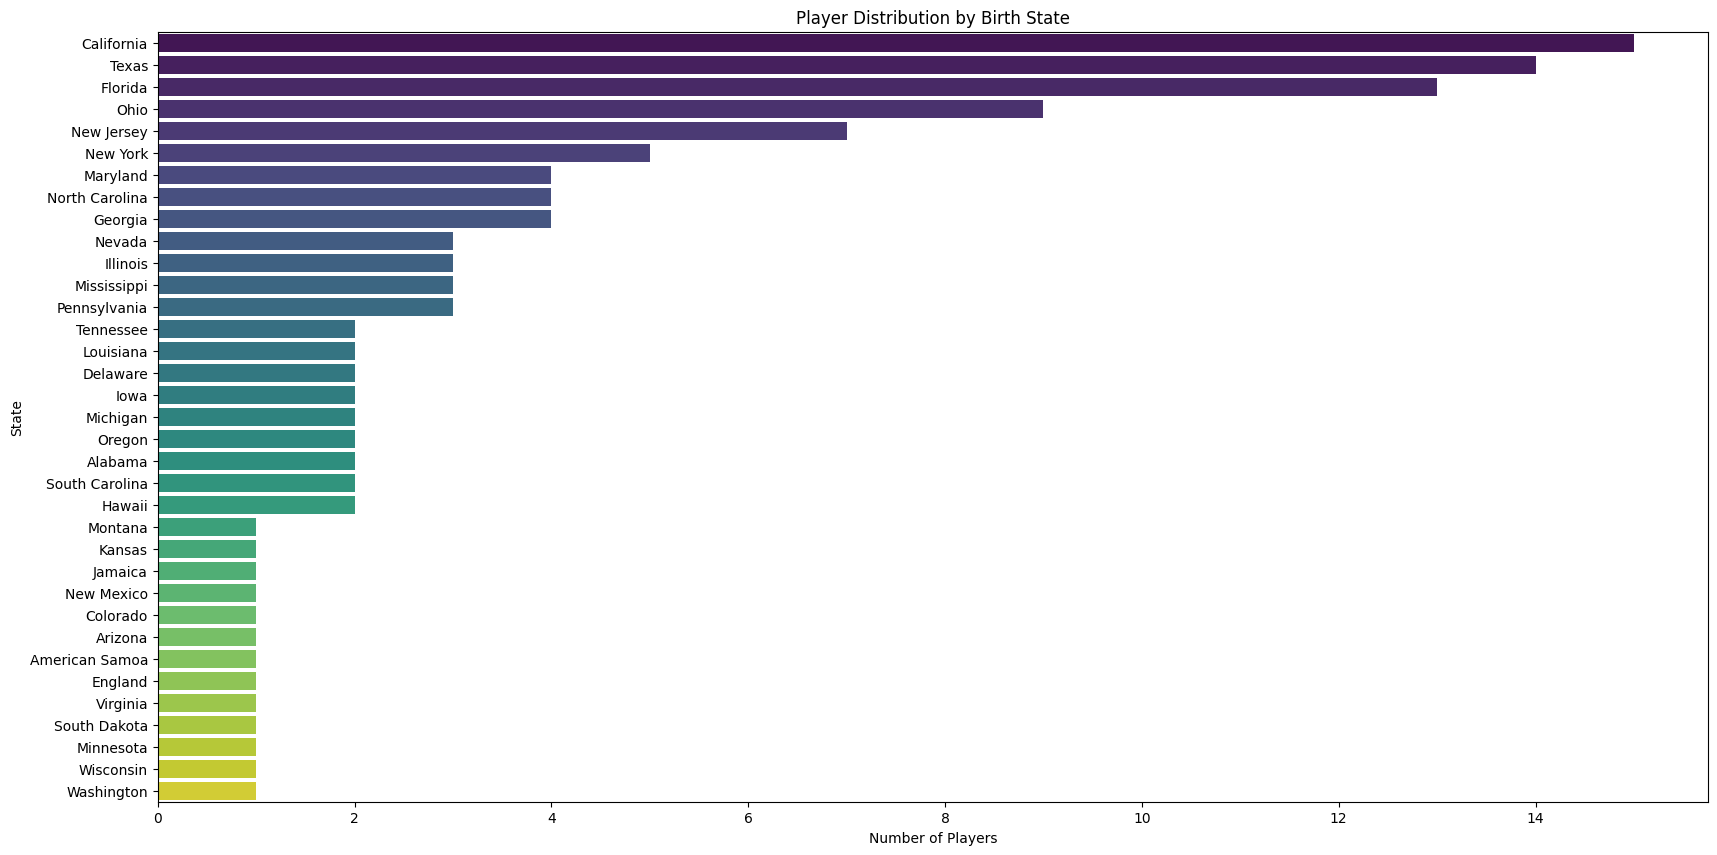

In [25]:
plt.figure(figsize=(20, 10))
sns.barplot(
    y=player_distribution_by_state["State"],
    x=player_distribution_by_state["Player Count"],
    palette="viridis",
)
plt.title("Player Distribution by Birth State")
plt.xlabel("Number of Players")
plt.ylabel("State")
plt.show()

### Comparing player count with state population


Merge player count data with population estimates for 2017


In [26]:
player_population_comparison = pd.merge(
    player_distribution_by_state,
    states_cleaned[["Geography Name", "Population Estimate (as of July 1) - 2017"]],
    how="left",
    left_on="State",
    right_on="Geography Name",
)

Drop unnecessary columns and rename for clarity


In [27]:
player_population_comparison = player_population_comparison[
    ["State", "Player Count", "Population Estimate (as of July 1) - 2017"]
]
player_population_comparison.columns = ["State", "Player Count", "Population 2017"]

Calculate players per capita (players per million residents)


In [28]:
player_population_comparison["Players per Million"] = player_population_comparison[
    "Player Count"
] / (player_population_comparison["Population 2017"] / 1_000_000)

Plot the comparison


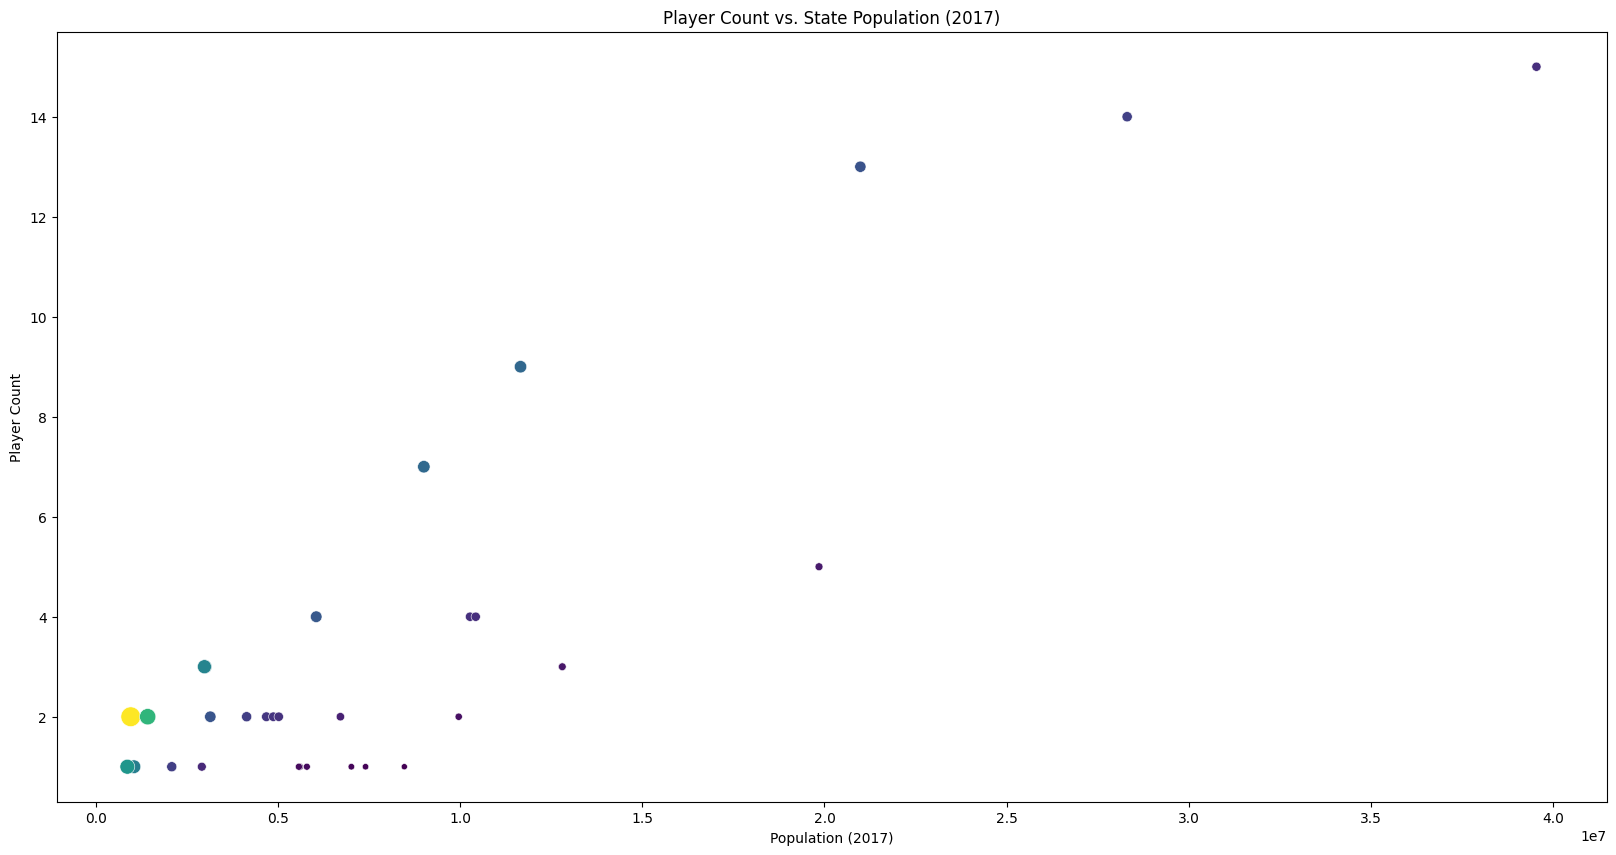

,State,Player Count,Population 2017,Players per Million
0,California,15,39536653.0,0.379395
1,Texas,14,28304596.0,0.494619
2,Florida,13,20984400.0,0.619508
3,Ohio,9,11658609.0,0.771962
4,New Jersey,7,9005644.0,0.777290


In [29]:
plt.figure(figsize=(20, 10))
sns.scatterplot(
    data=player_population_comparison,
    x="Population 2017",
    y="Player Count",
    hue="Players per Million",
    size="Players per Million",
    sizes=(20, 200),
    palette="viridis",
    legend=None,
)
plt.title("Player Count vs. State Population (2017)")
plt.xlabel("Population (2017)")
plt.ylabel("Player Count")
plt.show()

player_population_comparison.head()

### Analyzing players by college


In [30]:
college_distribution = cleaned_dataset["Player College"].value_counts().reset_index()
college_distribution.columns = ["College", "Player Count"]

Top 10 colleges by number of players


In [31]:
top_colleges = college_distribution.head(10)

Displaying detailed player information


In [32]:
player_information = cleaned_dataset[
    [
        "Player Name",
        "Player Jersey Number",
        "Player Position",
        "Player Age",
        "Player Weight (lbs.)",
        "Years Played",
        "Player Birth State",
        "Player College",
    ]
]

player_information.head()

,Player Name,Player Jersey Number,Player Position,Player Age,Player Weight (lbs.),Years Played,Player Birth State,Player College
0,Devin McCourty,#32,S/FS,30.0,195.0,8,New York,Rutgers
1,Danny Amendola,#80,PR/WR/KR,32.0,190.0,9,Texas,Texas Tech
2,Johnson Bademosi,#29,CB/SPTM/RCB,27.0,206.0,6,Maryland,Stanford
3,Chris Hogan,#15,WR,29.0,210.0,5,New Jersey,Monmouth
4,James Develin,#46,RB/FB,29.0,255.0,5,Pennsylvania,Brown


Plot the distribution of players by college


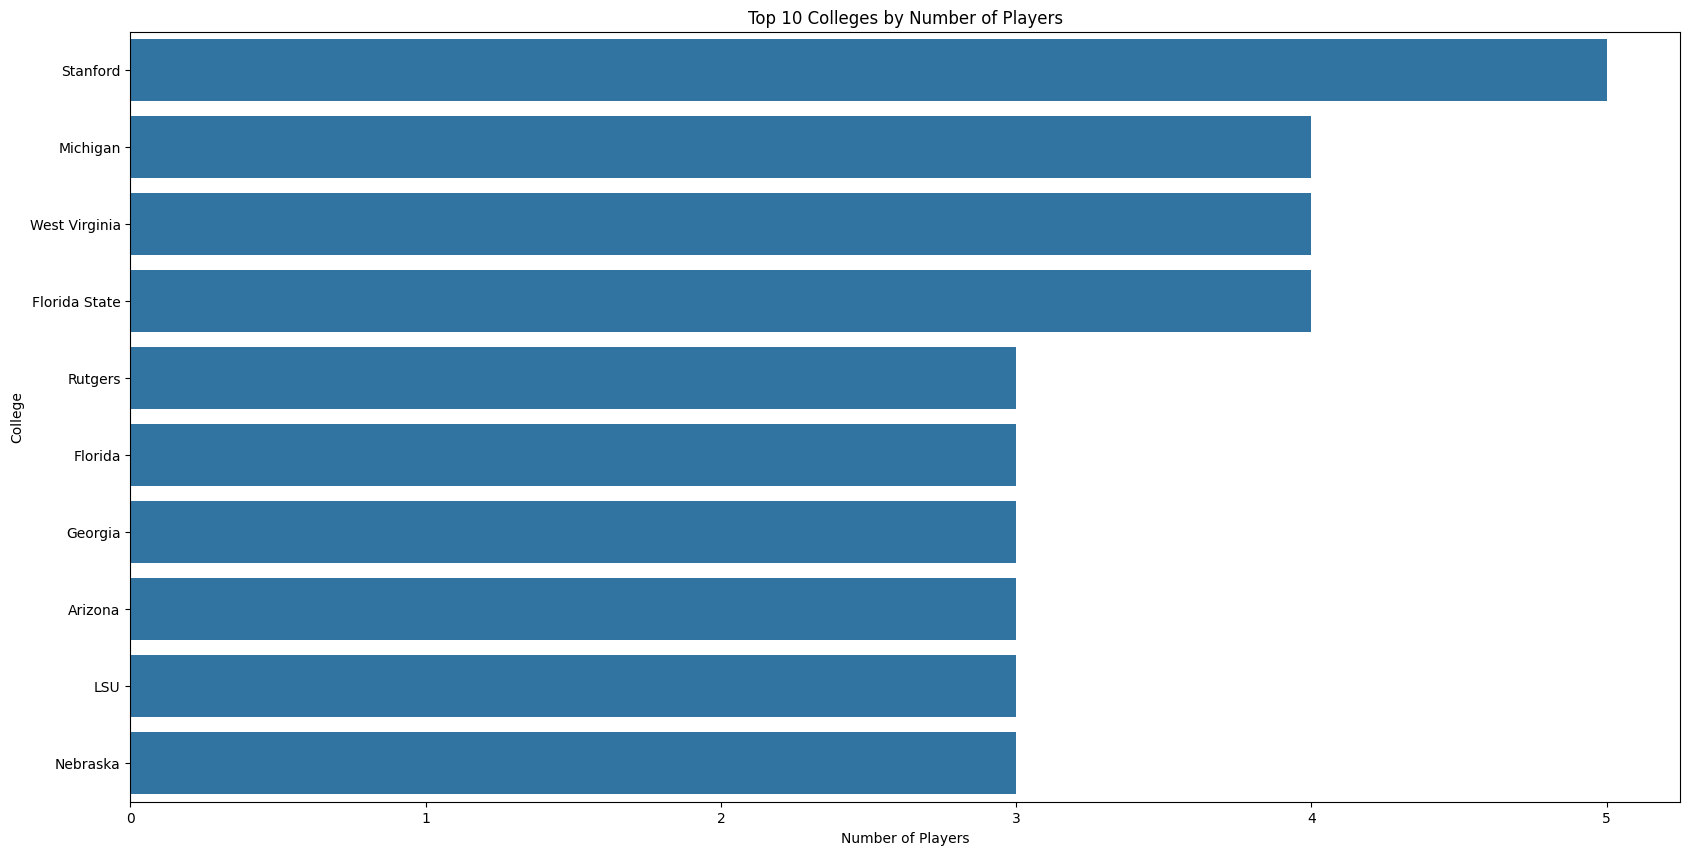

In [33]:
plt.figure(figsize=(20, 10))
sns.barplot(
    y=top_colleges["College"],
    x=top_colleges["Player Count"],
)
plt.title("Top 10 Colleges by Number of Players")
plt.xlabel("Number of Players")
plt.ylabel("College")
plt.show()

Cleaning the 'Years Played' column to ensure all values are numeric


In [34]:
cleaned_dataset["Years Played"] = pd.to_numeric(
    cleaned_dataset["Years Played"], errors="coerce"
)

Drop rows with NaN values in 'Years Played' after conversion


In [35]:
cleaned_dataset_clean = cleaned_dataset.dropna(subset=["Years Played"])

Recalculate performance by college (average years played)


In [36]:
college_performance_clean = (
    cleaned_dataset_clean.groupby("Player College")["Years Played"].mean().reset_index()
)
top_college_performance_clean = college_performance_clean[
    college_performance_clean["Player College"].isin(top_colleges["College"])
]

Detailed list of all colleges and the number of players they have produced


In [37]:
all_college_affiliations = (
    cleaned_dataset_clean["Player College"].value_counts().reset_index()
)
all_college_affiliations.columns = ["College", "Player Count"]


all_college_affiliations.head(20)

,College,Player Count
0,Stanford,5
1,Florida State,4
2,Michigan,4
3,Rutgers,3
4,Florida,3
5,Arizona,3
6,Georgia,3
7,LSU,3
8,Oregon,3
9,West Virginia,2


Plot the average years played by college


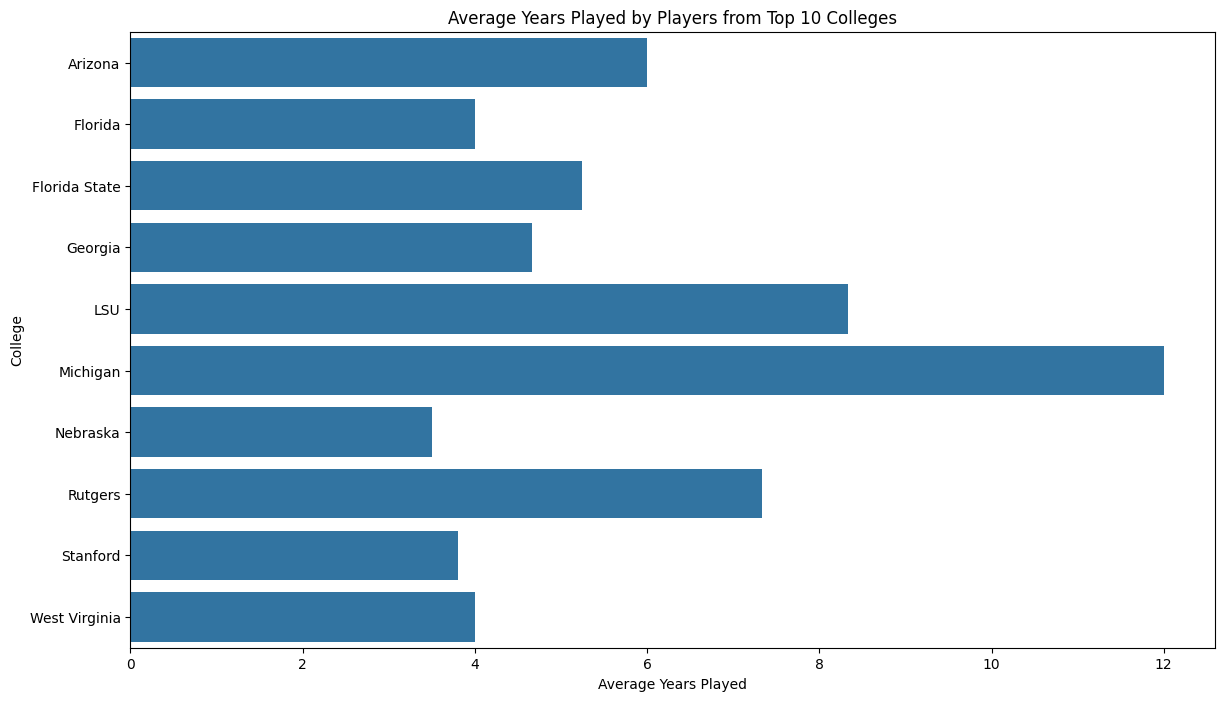

,Player College,Years Played
1,Arizona,6.000000
15,Florida,4.000000
16,Florida State,5.250000
17,Georgia,4.666667
24,LSU,8.333333
31,Michigan,12.000000
37,Nebraska,3.500000
48,Rutgers,7.333333
51,Stanford,3.800000
64,West Virginia,4.000000


In [38]:
plt.figure(figsize=(14, 8))
sns.barplot(
    y=top_college_performance_clean["Player College"],
    x=top_college_performance_clean["Years Played"],
)
plt.title("Average Years Played by Players from Top 10 Colleges")
plt.xlabel("Average Years Played")
plt.ylabel("College")
plt.show()

top_college_performance_clean

Analyzing position trends over the years


In [39]:
position_trends = (
    cleaned_dataset_clean.groupby(["Years Played", "Player Position"])
    .size()
    .reset_index(name="Count")
)

Plot the position trends over the years


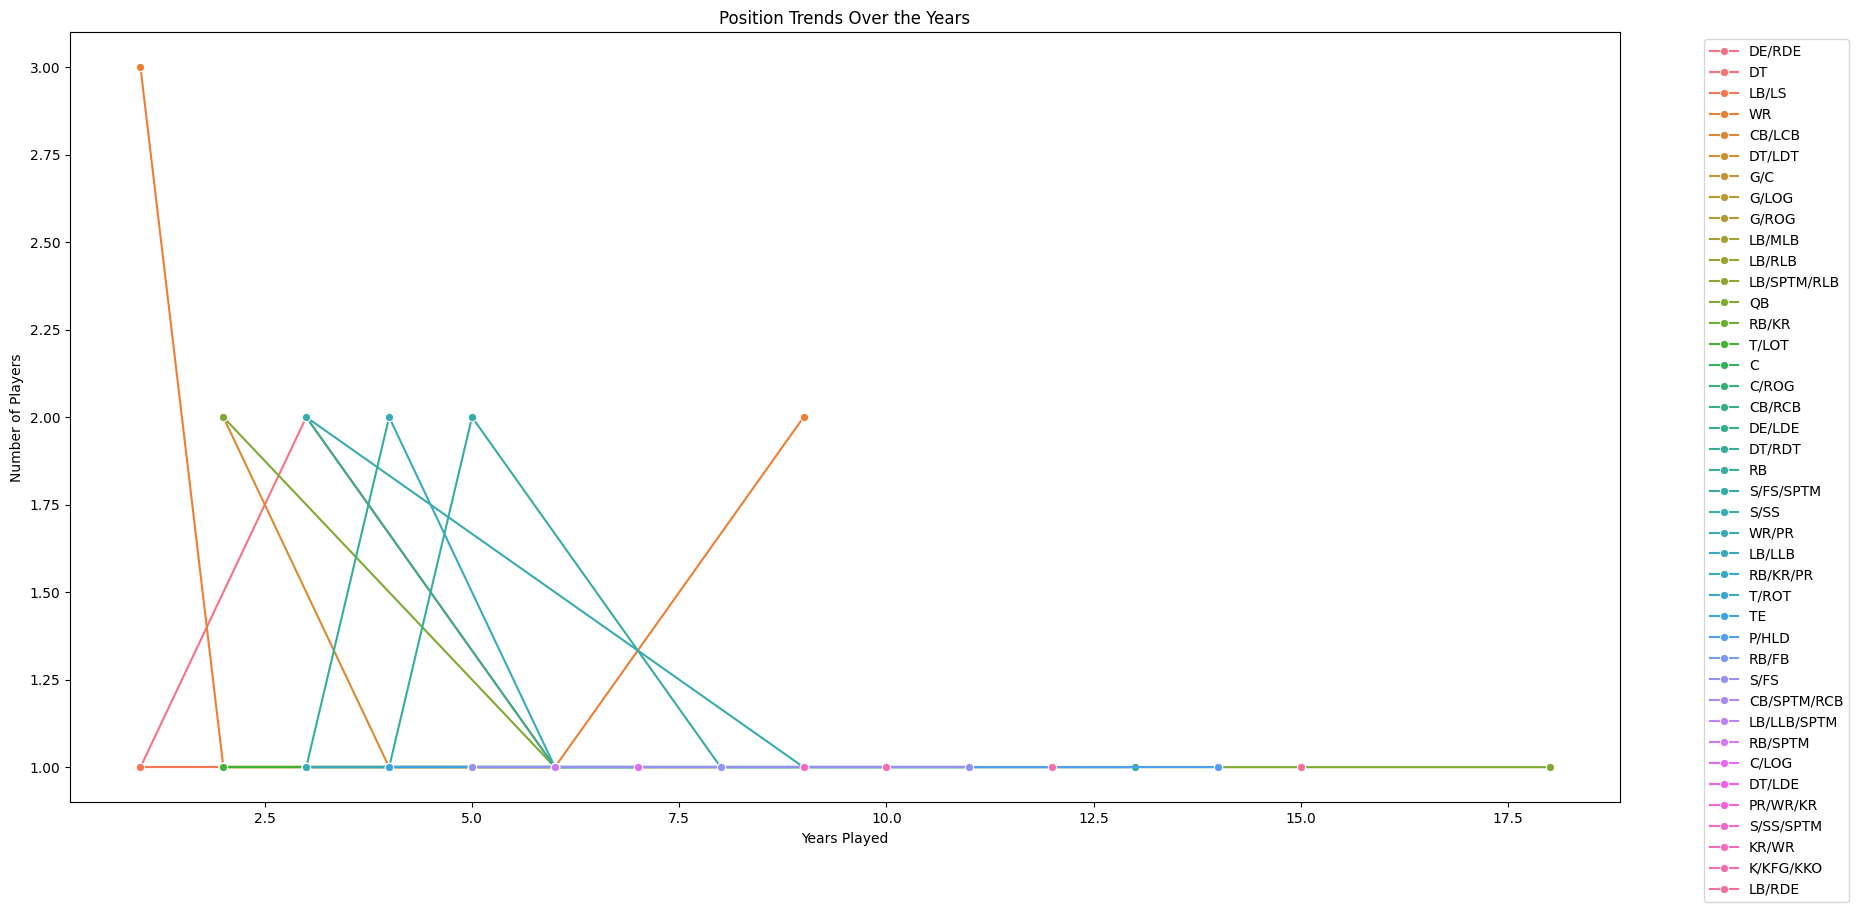

In [40]:
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=position_trends, x="Years Played", y="Count", hue="Player Position", marker="o"
)
plt.title("Position Trends Over the Years")
plt.xlabel("Years Played")
plt.ylabel("Number of Players")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()